In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from scipy.stats import norm
import copy

## Q1 (a)

In [3]:
N = 9
m = 3
mu = 3
beta = 0.96
phi = 1
rho = 0.3
sigma_sq_er = 0.01 * (1-(rho)**2)
sigma_sq_z = sigma_sq_er/(1-rho**2)
zn = m*(sigma_sq_z)**(1/2)
z0 = -zn
s = (zn-z0)/(N-1)
z_grid = np.arange(z0,zn+s,s)
print(z_grid)
b = np.zeros((9,9))
for j in range(N):
    for i in range(N):
        if j==0: 
            b[i,j] = norm.cdf((z0-rho*z_grid[i]+s/2)/sigma_sq_er**(1/2))
        elif j==N-1:
            b[i,j] = 1-norm.cdf((zn-rho*z_grid[i]-s/2)/sigma_sq_er**(1/2))
        else:
            b[i,j] = norm.cdf((z_grid[j] - rho*z_grid[i] + s/2)/sigma_sq_er**(1/2)) - norm.cdf((z_grid[j]-rho*z_grid[i]-s/2)
                                                                                       /sigma_sq_er**(1/2))
            

print(b)
print(np.exp(z_grid))

[-0.3   -0.225 -0.15  -0.075  0.     0.075  0.15   0.225  0.3  ]
[[3.52805842e-02 1.18091475e-01 2.53397008e-01 3.02191106e-01
  2.00357192e-01 7.37963542e-02 1.50732903e-02 1.70313471e-03
  1.09855133e-04]
 [2.04690973e-02 8.37373046e-02 2.14354009e-01 3.04863406e-01
  2.41062359e-01 1.05927790e-01 2.58286367e-02 3.48664672e-03
  2.70750483e-04]
 [1.13032654e-02 5.63099151e-02 1.71986068e-01 2.91733854e-01
  2.75102216e-01 1.44200358e-01 4.19648527e-02 6.76624640e-03
  6.33224834e-04]
 [5.93671933e-03 3.59079082e-02 1.30879138e-01 2.64803013e-01
  2.97789168e-01 1.86176853e-01 6.46532749e-02 1.24480924e-02
  1.40583226e-03]
 [2.96390859e-03 2.17123197e-02 9.44590725e-02 2.27984995e-01
  3.05759408e-01 2.27984995e-01 9.44590725e-02 2.17123197e-02
  2.96390859e-03]
 [1.40583226e-03 1.24480924e-02 6.46532749e-02 1.86176853e-01
  2.97789168e-01 2.64803013e-01 1.30879138e-01 3.59079082e-02
  5.93671933e-03]
 [6.33224834e-04 6.76624640e-03 4.19648527e-02 1.44200358e-01
  2.75102216e-01 2.91

## Q1 (b):
Primeira parte é uma tentativa mais elegante, o segundo bloco é mais 'braçal'

In [4]:
a_size=201
valor = np.zeros((1,a_size))
print(valor[:,1])

[0.]


[-1.    -0.975 -0.95  -0.925 -0.9   -0.875 -0.85  -0.825 -0.8   -0.775
 -0.75  -0.725 -0.7   -0.675 -0.65  -0.625 -0.6   -0.575 -0.55  -0.525
 -0.5   -0.475 -0.45  -0.425 -0.4   -0.375 -0.35  -0.325 -0.3   -0.275
 -0.25  -0.225 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025
  0.     0.025  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225
  0.25   0.275  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475
  0.5    0.525  0.55   0.575  0.6    0.625  0.65   0.675  0.7    0.725
  0.75   0.775  0.8    0.825  0.85   0.875  0.9    0.925  0.95   0.975
  1.     1.025  1.05   1.075  1.1    1.125  1.15   1.175  1.2    1.225
  1.25   1.275  1.3    1.325  1.35   1.375  1.4    1.425  1.45   1.475
  1.5    1.525  1.55   1.575  1.6    1.625  1.65   1.675  1.7    1.725
  1.75   1.775  1.8    1.825  1.85   1.875  1.9    1.925  1.95   1.975
  2.     2.025  2.05   2.075  2.1    2.125  2.15   2.175  2.2    2.225
  2.25   2.275  2.3    2.325  2.35   2.375  2.4    2.425  2.45   2.475
  2.5 

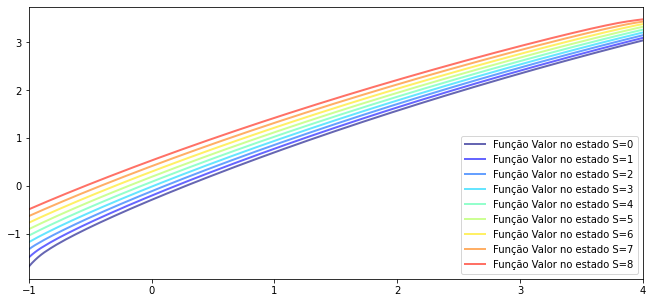

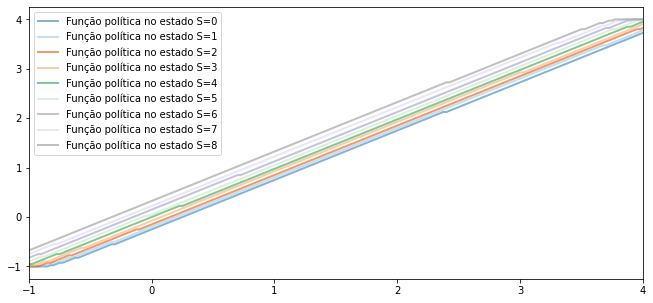

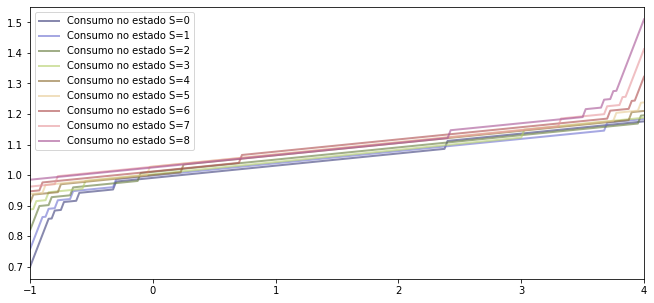

In [5]:
# ORDEM DA FUNÇÃO VALOR: LINHA É a, COLUNA É Z
a_size=201
a_max=4
tol = 10**(-6)
r=0.04
V_0 = np.zeros((a_size, N))
grid_a = np.linspace(-phi, a_max, a_size)
print(grid_a)
V_new = copy.deepcopy(V_0)
erro = 1
g = np.zeros((a_size, N))
t= 1
while(erro > tol):
    V_old = copy.deepcopy(V_new)
    t += 1
    for i in range(N):
        probabilidades = b[i,:]
        for j in range(a_size):
            estoque = np.exp(z_grid[i]) + (1+r)*grid_a[j]
            if j == 0:
                start = 0
            valor = np.zeros((1,a_size))
            t = copy.deepcopy(start)
            c_t = (estoque - grid_a[t])
            if c_t >= 0:
                u = ((c_t**(1-mu) - 1)/(1-mu))
            elif c_t < 0:
                u = -1/(1-mu)
            esperanca = 0
            for w in range(N):
                esperanca = (esperanca + probabilidades[w]*V_old[t,w])
            valor[:,t] = (u + beta*esperanca)
            for t in range((start+1), a_size):
                c_t = (estoque - grid_a[t])
                if c_t >= 0:
                    u = ((c_t**(1-mu) - 1)/(1-mu))
                elif c_t < 0:
                    u = -1/(1-mu)
                esperanca = 0
                for w in range(N):
                    esperanca = esperanca + probabilidades[w]*V_old[t,w]
                valor[:,t] = (u + beta*esperanca)
                if valor[:,t]< valor[:,t-1]:
                    break
            if valor[:,t]< valor[:,t-1]:
                V_new[j,i] = copy.deepcopy(valor[:,t-1])
                indice_a = (t-1)
            elif valor[:,t] >= valor[:,t-1]:
                V_new[j,i] = copy.deepcopy(valor[:,t])
                indice_a = (t)
            start = copy.deepcopy(indice_a)
            g[j,i] = copy.deepcopy(grid_a[indice_a])
    
    dif = np.abs(V_new - V_old)
    erro = np.max(np.max(dif))
    print(erro)
fig, ax = plt.subplots()
for i in range(N):
    ax.plot(grid_a, V_new[:,i], color=plt.cm.jet(i / N), lw=2, alpha=0.6, label=f'Função Valor no estado S={i}')
ax.legend()
ax.set(xlim=(np.min(grid_a), np.max(grid_a)))
plt.show()
fig, ax = plt.subplots()
for i in range(N):
    ax.plot(grid_a, g[:,i], color=plt.cm.tab20c(i / N), lw=2, alpha=0.6, label=f'Função política no estado S={i}')
ax.legend()
ax.set(xlim=(np.min(grid_a), np.max(grid_a)))
plt.show()
fig, ax = plt.subplots()
for i in range(N):
    ax.plot(grid_a, -g[:,i]+(1+r)*grid_a+np.exp(z_grid[i]), color=plt.cm.tab20b(i / N), lw=2, alpha=0.6, label=f'Consumo no estado S={i}')
ax.legend()
ax.set(xlim=(np.min(grid_a), np.max(grid_a)))
plt.show()

## Q1(c)

In [25]:
pi_0 = np.full((a_size, N),(1/(N*a_size)))

tol_distrb = 10**(-6)
pi_old = copy.deepcopy(pi_0)
pi_new = copy.deepcopy(pi_0)
pi_dif = np.ones((a_size,N),dtype=float)
erro = 1
t=0
pi_iter = [pi_0]
while(erro>tol_distrb):
    t += 1
    for i in range(N):
        for j in range(a_size):
            aux = pi_old*(g == grid_a[j])
            pi_new[j,i] = sum(aux)@b[:,i]
            pi_dif[j,i] = (pi_new[j,i]-pi_old[j,i])
            pi_dif[j,i] = np.abs(pi_dif[j,i])
    erro = np.max(pi_dif)
    pi_old = copy.deepcopy(pi_new)
    
print(f'Convergência após t={t}')


Convergência após t=380


In [55]:
def asset_marginal(pi,a_size,N):
    asset_dist = np.zeros(a_size)
    for i in range(a_size):
        for j in range(N):
            asset_dist[i] += pi[i,j]
    return(asset_dist)


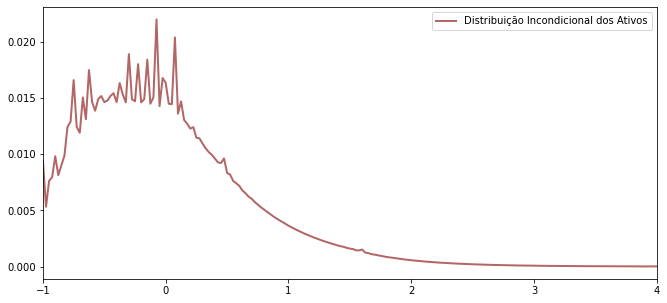

In [56]:
dist_a = asset_marginal(pi_new,a_size,N)

fig, ax = plt.subplots()
ax.plot(grid_a, dist_a, color=plt.cm.jet(i / N), lw=2, alpha=0.6, label=f'Distribuição Incondicional dos Ativos')
ax.legend()
ax.set(xlim=(np.min(grid_a), np.max(grid_a)))
plt.show()

[0.         0.00940138 0.01472054 0.0223347  0.03029188 0.04010647
 0.04823337 0.05723646 0.06710235 0.07952931 0.0924078  0.10899298
 0.12141313 0.13331769 0.14835783 0.16147142 0.17895299 0.19359885
 0.20746079 0.22235195 0.23752224 0.25214852 0.26691394 0.28208584
 0.29750491 0.31212786 0.3284493  0.34376728 0.35836555 0.37726019
 0.392138   0.40684159 0.42484691 0.43945193 0.45434171 0.47274585
 0.48723126 0.50227632 0.52426712 0.53854424 0.55531688 0.57165343
 0.58613815 0.60058141 0.62096326 0.63456337 0.64925578 0.66229411
 0.67498918 0.68726399 0.69966072 0.71112408 0.72252931 0.73347098
 0.74399343 0.75418557 0.76413684 0.77374546 0.78301951 0.79222341
 0.80184184 0.81016695 0.81834228 0.82594486 0.83334706 0.84051405
 0.84727384 0.85379517 0.86001407 0.8660475  0.87178996 0.87730311
 0.88258022 0.88765446 0.89252632 0.89718919 0.90166368 0.90595234
 0.91007719 0.91402674 0.9178172  0.92145321 0.92494236 0.92829117
 0.93150886 0.93458917 0.93754413 0.94038095 0.94310181 0.9457

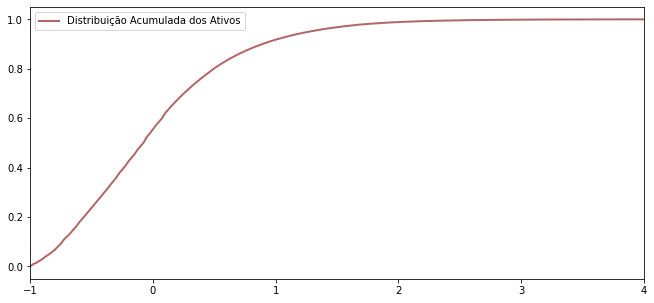

In [60]:
cdf_a = np.zeros(a_size)
for i in range(a_size):
    for j in range(i):
        cdf_a[i] += dist_a[j]
        
print(cdf_a)

fig, ax = plt.subplots()
ax.plot(grid_a, cdf_a, color=plt.cm.jet(i / N), lw=2, alpha=0.6, label=f'Distribuição Acumulada dos Ativos')
ax.legend()
ax.set(xlim=(np.min(grid_a), np.max(grid_a)))
plt.show()

## Q1 (d)

In [7]:
# CALCULAR DEMANDA POR CAPITAL

demanda = 0

for i in range(N):
    for j in range(a_size):
        demanda += g[j,i]*pi_new[j,i]
       
        
print(demanda)

0.10567905266217047


## Q1 (e)
### i.

In [8]:
N = 9
m = 3
mu = 5
beta = 0.96
phi = 1
rho = 0.3
sigma_sq_er = 0.01 * (1-(rho)**2)
sigma_sq_z = sigma_sq_er/(1-rho**2)
zn = m*(sigma_sq_z)**(1/2)
z0 = -zn
s = (zn-z0)/(N-1)
z_grid = np.arange(z0,zn+s,s)
b = np.zeros((9,9))
for j in range(N):
    for i in range(N):
        if j==0: 
            b[i,j] = norm.cdf((z0-rho*z_grid[i]+s/2)/sigma_sq_er**(1/2))
        elif j==N-1:
            b[i,j] = 1-norm.cdf((zn-rho*z_grid[i]-s/2)/sigma_sq_er**(1/2))
        else:
            b[i,j] = norm.cdf((z_grid[j] - rho*z_grid[i] + s/2)/sigma_sq_er**(1/2)) - norm.cdf((z_grid[j]-rho*z_grid[i]-s/2)
                                                                                       /sigma_sq_er**(1/2))
a_size=201
valor = np.zeros((1,a_size))
# ORDEM DA FUNÇÃO VALOR: LINHA É a, COLUNA É Z
a_size=201
a_max=4
tol = 10**(-6)
r=0.04
V_0 = np.zeros((a_size, N))
grid_a = np.linspace(-phi, a_max, a_size)
V_new = copy.deepcopy(V_0)
erro = 1
g = np.zeros((a_size, N))
t= 1
while(erro > tol):
    V_old = copy.deepcopy(V_new)
    t += 1
    for i in range(N):
        probabilidades = b[i,:]
        for j in range(a_size):
            estoque = np.exp(z_grid[i]) + (1+r)*grid_a[j]
            if j == 0:
                start = 0
            valor = np.zeros((1,a_size))
            t = copy.deepcopy(start)
            c_t = (estoque - grid_a[t])
            if c_t >= 0:
                u = ((c_t**(1-mu) - 1)/(1-mu))
            elif c_t < 0:
                u = -1/(1-mu)
            esperanca = 0
            for w in range(N):
                esperanca = (esperanca + probabilidades[w]*V_old[t,w])
            valor[:,t] = (u + beta*esperanca)
            for t in range((start+1), a_size):
                c_t = (estoque - grid_a[t])
                if c_t >= 0:
                    u = ((c_t**(1-mu) - 1)/(1-mu))
                elif c_t < 0:
                    u = -1/(1-mu)
                esperanca = 0
                for w in range(N):
                    esperanca = esperanca + probabilidades[w]*V_old[t,w]
                valor[:,t] = (u + beta*esperanca)
                if valor[:,t]< valor[:,t-1]:
                    break
            if valor[:,t]< valor[:,t-1]:
                V_new[j,i] = copy.deepcopy(valor[:,t-1])
                indice_a = (t-1)
            elif valor[:,t] >= valor[:,t-1]:
                V_new[j,i] = copy.deepcopy(valor[:,t])
                indice_a = (t)
            start = copy.deepcopy(indice_a)
            g[j,i] = copy.deepcopy(grid_a[indice_a])
    
    dif = np.abs(V_new - V_old)
    erro = np.max(np.max(dif))
pi_0 = np.full((a_size, N),(1/(N*a_size)))

tol_distrb = 10**(-6)
pi_old = copy.deepcopy(pi_0)
pi_new = copy.deepcopy(pi_0)
pi_dif = np.ones((a_size,N),dtype=float)
erro = 1
t=0
pi_iter = [pi_0]
while(erro>tol_distrb):
    t += 1
    for i in range(N):
        for j in range(a_size):
            aux = pi_old*(g == grid_a[j])
            pi_new[j,i] = sum(aux)@b[:,i]
            pi_dif[j,i] = (pi_new[j,i]-pi_old[j,i])
            pi_dif[j,i] = np.abs(pi_dif[j,i])
    erro = np.max(pi_dif)
    pi_old = copy.deepcopy(pi_new)
# CALCULAR DEMANDA POR CAPITAL

demanda2 = 0

for i in range(N):
    for j in range(a_size):
        demanda2 += g[j,i]*pi_new[j,i]
               
if demanda2>demanda: 
    sinal = 'um aumento'
else: 
    sinal = 'uma diminuição'

print(f'Nosso excesso de demanda é de {demanda2}, {sinal} de {abs(demanda2-demanda)}. Originalmente tínhamos {demanda}.')

Nosso excesso de demanda é de 1.193686529578574, um aumento de 1.0880074769164034. Originalmente tínhamos 0.10567905266217047.


### ii.

In [9]:
N = 9
m = 3
mu = 3
beta = 0.96
phi = 1
rho = 0.6
sigma_sq_er = 0.01 * (1-(rho)**2)
sigma_sq_z = sigma_sq_er/(1-rho**2)
zn = m*(sigma_sq_z)**(1/2)
z0 = -zn
s = (zn-z0)/(N-1)
z_grid = np.arange(z0,zn+s,s)
b = np.zeros((9,9))
for j in range(N):
    for i in range(N):
        if j==0: 
            b[i,j] = norm.cdf((z0-rho*z_grid[i]+s/2)/sigma_sq_er**(1/2))
        elif j==N-1:
            b[i,j] = 1-norm.cdf((zn-rho*z_grid[i]-s/2)/sigma_sq_er**(1/2))
        else:
            b[i,j] = norm.cdf((z_grid[j] - rho*z_grid[i] + s/2)/sigma_sq_er**(1/2)) - norm.cdf((z_grid[j]-rho*z_grid[i]-s/2)
                                                                                       /sigma_sq_er**(1/2))
a_size=201
valor = np.zeros((1,a_size))
# ORDEM DA FUNÇÃO VALOR: LINHA É a, COLUNA É Z
a_size=201
a_max=4
tol = 10**(-6)
r=0.04
V_0 = np.zeros((a_size, N))
grid_a = np.linspace(-phi, a_max, a_size)
V_new = copy.deepcopy(V_0)
erro = 1
g = np.zeros((a_size, N))
t= 1
while(erro > tol):
    V_old = copy.deepcopy(V_new)
    t += 1
    for i in range(N):
        probabilidades = b[i,:]
        for j in range(a_size):
            estoque = np.exp(z_grid[i]) + (1+r)*grid_a[j]
            if j == 0:
                start = 0
            valor = np.zeros((1,a_size))
            t = copy.deepcopy(start)
            c_t = (estoque - grid_a[t])
            if c_t >= 0:
                u = ((c_t**(1-mu) - 1)/(1-mu))
            elif c_t < 0:
                u = -1/(1-mu)
            esperanca = 0
            for w in range(N):
                esperanca = (esperanca + probabilidades[w]*V_old[t,w])
            valor[:,t] = (u + beta*esperanca)
            for t in range((start+1), a_size):
                c_t = (estoque - grid_a[t])
                if c_t >= 0:
                    u = ((c_t**(1-mu) - 1)/(1-mu))
                elif c_t < 0:
                    u = -1/(1-mu)
                esperanca = 0
                for w in range(N):
                    esperanca = esperanca + probabilidades[w]*V_old[t,w]
                valor[:,t] = (u + beta*esperanca)
                if valor[:,t]< valor[:,t-1]:
                    break
            if valor[:,t]< valor[:,t-1]:
                V_new[j,i] = copy.deepcopy(valor[:,t-1])
                indice_a = (t-1)
            elif valor[:,t] >= valor[:,t-1]:
                V_new[j,i] = copy.deepcopy(valor[:,t])
                indice_a = (t)
            start = copy.deepcopy(indice_a)
            g[j,i] = copy.deepcopy(grid_a[indice_a])
    
    dif = np.abs(V_new - V_old)
    erro = np.max(np.max(dif))
pi_0 = np.full((a_size, N),(1/(N*a_size)))

tol_distrb = 10**(-6)
pi_old = copy.deepcopy(pi_0)
pi_new = copy.deepcopy(pi_0)
pi_dif = np.ones((a_size,N),dtype=float)
erro = 1
t=0
pi_iter = [pi_0]
while(erro>tol_distrb):
    t += 1
    for i in range(N):
        for j in range(a_size):
            aux = pi_old*(g == grid_a[j])
            pi_new[j,i] = sum(aux)@b[:,i]
            pi_dif[j,i] = (pi_new[j,i]-pi_old[j,i])
            pi_dif[j,i] = np.abs(pi_dif[j,i])
    erro = np.max(pi_dif)
    pi_old = copy.deepcopy(pi_new)
# CALCULAR DEMANDA POR CAPITAL

demanda3 = 0

for i in range(N):
    for j in range(a_size):
        demanda3 += g[j,i]*pi_new[j,i]
               
if demanda3>demanda: 
    sinal = 'um aumento'
else: 
    sinal = 'uma diminuição'

print(f'Nosso excesso de demanda é de {demanda3}, {sinal} de {abs(demanda3-demanda)}. Originalmente tínhamos {demanda}.')

Nosso excesso de demanda é de 0.639839184317716, um aumento de 0.5341601316555455. Originalmente tínhamos 0.10567905266217047.


### iii.

In [61]:
N = 9
m = 3
mu = 3
beta = 0.96
phi = 1
rho = 0.3
sigma_sq_er = 0.04 * (1-(rho)**2)
sigma_sq_z = sigma_sq_er/(1-rho**2)
zn = m*(sigma_sq_z)**(1/2)
z0 = -zn
s = (zn-z0)/(N-1)
z_grid = np.arange(z0,zn+s,s)
b = np.zeros((9,9))
for j in range(N):
    for i in range(N):
        if j==0: 
            b[i,j] = norm.cdf((z0-rho*z_grid[i]+s/2)/sigma_sq_er**(1/2))
        elif j==N-1:
            b[i,j] = 1-norm.cdf((zn-rho*z_grid[i]-s/2)/sigma_sq_er**(1/2))
        else:
            b[i,j] = norm.cdf((z_grid[j] - rho*z_grid[i] + s/2)/sigma_sq_er**(1/2)) - norm.cdf((z_grid[j]-rho*z_grid[i]-s/2)
                                                                                       /sigma_sq_er**(1/2))
a_size=201
valor = np.zeros((1,a_size))
# ORDEM DA FUNÇÃO VALOR: LINHA É a, COLUNA É Z
a_size=201
a_max=4
tol = 10**(-6)
r=0.04
V_0 = np.zeros((a_size, N))
grid_a = np.linspace(-phi, a_max, a_size)
V_new = copy.deepcopy(V_0)
erro = 1
g = np.zeros((a_size, N))
t= 1
while(erro > tol):
    V_old = copy.deepcopy(V_new)
    t += 1
    for i in range(N):
        probabilidades = b[i,:]
        for j in range(a_size):
            estoque = np.exp(z_grid[i]) + (1+r)*grid_a[j]
            if j == 0:
                start = 0
            valor = np.zeros((1,a_size))
            t = copy.deepcopy(start)
            c_t = (estoque - grid_a[t])
            if c_t >= 0:
                u = ((c_t**(1-mu) - 1)/(1-mu))
            elif c_t < 0:
                u = -1/(1-mu)
            esperanca = 0
            for w in range(N):
                esperanca = (esperanca + probabilidades[w]*V_old[t,w])
            valor[:,t] = (u + beta*esperanca)
            for t in range((start+1), a_size):
                c_t = (estoque - grid_a[t])
                if c_t >= 0:
                    u = ((c_t**(1-mu) - 1)/(1-mu))
                elif c_t < 0:
                    u = -1/(1-mu)
                esperanca = 0
                for w in range(N):
                    esperanca = esperanca + probabilidades[w]*V_old[t,w]
                valor[:,t] = (u + beta*esperanca)
                if valor[:,t]< valor[:,t-1]:
                    break
            if valor[:,t]< valor[:,t-1]:
                V_new[j,i] = copy.deepcopy(valor[:,t-1])
                indice_a = (t-1)
            elif valor[:,t] >= valor[:,t-1]:
                V_new[j,i] = copy.deepcopy(valor[:,t])
                indice_a = (t)
            start = copy.deepcopy(indice_a)
            g[j,i] = copy.deepcopy(grid_a[indice_a])
    
    dif = np.abs(V_new - V_old)
    erro = np.max(np.max(dif))
pi_0 = np.full((a_size, N),(1/(N*a_size)))

tol_distrb = 10**(-6)
pi_old = copy.deepcopy(pi_0)
pi_new = copy.deepcopy(pi_0)
pi_dif = np.ones((a_size,N),dtype=float)
erro = 1
t=0
pi_iter = [pi_0]
while(erro>tol_distrb):
    t += 1
    for i in range(N):
        for j in range(a_size):
            aux = pi_old*(g == grid_a[j])
            pi_new[j,i] = sum(aux)@b[:,i]
            pi_dif[j,i] = (pi_new[j,i]-pi_old[j,i])
            pi_dif[j,i] = np.abs(pi_dif[j,i])
    erro = np.max(pi_dif)
    pi_old = copy.deepcopy(pi_new)
# CALCULAR DEMANDA POR CAPITAL

demanda4 = 0

for i in range(N):
    for j in range(a_size):
        demanda4 += g[j,i]*pi_new[j,i]
if demanda4>demanda: 
    sinal = 'um aumento'
else: 
    sinal = 'uma diminuição'

print(f'Nosso excesso de demanda é de {demanda4}, {sinal} de {abs(demanda4-demanda)}. Originalmente tínhamos {demanda}.')

Nosso excesso de demanda é de 1.391891065891369, um aumento de 1.2862120132291985. Originalmente tínhamos 0.10567905266217047.


## Q1 (bonus)


In [41]:
N = 9
m = 3
mu = 3
beta = 0.96
phi = 1
rho = 0.3
sigma_sq_er = 0.01 * (1-(rho)**2)
sigma_sq_z = sigma_sq_er/(1-rho**2)




            

In [42]:
# Repetindo o código da questão 1 (pois ele não vai mudar a cada loop)
zn = m*(sigma_sq_z)**(1/2)
z0 = -zn
s = (zn-z0)/(N-1)
z_grid = np.arange(z0,zn+s,s)
b = np.zeros((9,9))
for j in range(N):
    for i in range(N):
        if j==0: 
            b[i,j] = norm.cdf((z0-rho*z_grid[i]+s/2)/sigma_sq_er**(1/2))
        elif j==N-1:
            b[i,j] = 1-norm.cdf((zn-rho*z_grid[i]-s/2)/sigma_sq_er**(1/2))
        else:
            b[i,j] = norm.cdf((z_grid[j] - rho*z_grid[i] + s/2)/sigma_sq_er**(1/2)) - norm.cdf((z_grid[j]-rho*z_grid[i]-s/2)
                                                                                       /sigma_sq_er**(1/2))
a_size=201
a_max=4
tol = 10**(-6)
grid_a = np.linspace(-phi, a_max, a_size)

In [50]:
R_inf = 0
R_sup = 1.04 #1+r = R

demanda_inf = -1
demanda_sup = copy.deepcopy(demanda)

# Vamos agora fazer o loop para o método da bissecção
cont = 0
demanda_abs=1
while (demanda_abs>10**(-3)):
    r = (-demanda_inf*R_sup + demanda_sup*R_inf)/(demanda_sup-demanda_inf) - 1

    V_0 = np.zeros((a_size, N))
    V_new = copy.deepcopy(V_0)
    erro = 1
    g = np.zeros((a_size, N))
    t= 1
    while(erro > tol):
        V_old = copy.deepcopy(V_new)
        t += 1
        for i in range(N):
            probabilidades = b[i,:]
            for j in range(a_size):
                estoque = np.exp(z_grid[i]) + (1+r)*grid_a[j]
                if j == 0:
                    start = 0
                valor = np.zeros((1,a_size))
                t = copy.deepcopy(start)
                c_t = (estoque - grid_a[t])
                if c_t >= 0:
                    u = ((c_t**(1-mu) - 1)/(1-mu))
                elif c_t < 0:
                    u = -1/(1-mu)
                esperanca = 0
                for w in range(N):
                    esperanca = (esperanca + probabilidades[w]*V_old[t,w])
                valor[:,t] = (u + beta*esperanca)
                for t in range((start+1), a_size):
                    c_t = (estoque - grid_a[t])
                    if c_t >= 0:
                        u = ((c_t**(1-mu) - 1)/(1-mu))
                    elif c_t < 0:
                        u = -1/(1-mu)
                    esperanca = 0
                    for w in range(N):
                        esperanca = esperanca + probabilidades[w]*V_old[t,w]
                    valor[:,t] = (u + beta*esperanca)
                    if valor[:,t]< valor[:,t-1]:
                        break
                if valor[:,t]< valor[:,t-1]:
                    V_new[j,i] = copy.deepcopy(valor[:,t-1])
                    indice_a = (t-1)
                elif valor[:,t] >= valor[:,t-1]:
                    V_new[j,i] = copy.deepcopy(valor[:,t])
                    indice_a = (t)
                start = copy.deepcopy(indice_a)
                g[j,i] = copy.deepcopy(grid_a[indice_a])

        dif = np.abs(V_new - V_old)
        erro = np.max(np.max(dif))
    pi_0 = np.full((a_size, N),(1/(N*a_size)))

    tol_distrb = 10**(-6)
    pi_old = copy.deepcopy(pi_0)
    pi_new = copy.deepcopy(pi_0)
    pi_dif = np.ones((a_size,N),dtype=float)
    erro = 1
    t=0
    pi_iter = [pi_0]
    while(erro>tol_distrb):
        t += 1
        for i in range(N):
            for j in range(a_size):
                aux = pi_old*(g == grid_a[j])
                pi_new[j,i] = sum(aux)@b[:,i]
                pi_dif[j,i] = (pi_new[j,i]-pi_old[j,i])
                pi_dif[j,i] = np.abs(pi_dif[j,i])
        erro = np.max(pi_dif)
        pi_old = copy.deepcopy(pi_new)
    # CALCULAR DEMANDA POR CAPITAL

    demanda_new = 0
    cont += 1

    for i in range(N):
        for j in range(a_size):
            demanda_new += g[j,i]*pi_new[j,i]
    demanda_abs=abs(copy.deepcopy(demanda_new))
    if demanda_new>0:
        R_sup = copy.deepcopy(1+r)
        demanda_sup = copy.deepcopy(demanda_new)
        print(f'{cont})r = {r}, o excesso de de demanda é de {demanda_sup}')
    elif demanda_new<0:
        R_inf = copy.deepcopy(1+r)
        demanda_inf = copy.deepcopy(demanda_new)
        print(f'{cont})r = {r}, o excesso de de demanda é de {demanda_inf}')
        
print(f'A taxa de juros que equilibra o mercado é {r}')
print(demanda_new)



1)r = -0.0594015528322015, o excesso de de demanda é de -0.9662329566746343
2)r = 0.03020007067282071, o excesso de de demanda é de -0.6887722467619568
3)r = 0.038696399328437936, o excesso de de demanda é de -0.25682421118642784
4)r = 0.039619966776139215, o excesso de de demanda é de -0.06018013410577703
5)r = 0.03975785754253125, o excesso de de demanda é de -0.007738950862029515
6)r = 0.03977437986281318, o excesso de de demanda é de 0.0021772174395949116
7)r = 0.0397707521829711, o excesso de de demanda é de 0.0015307393635582021
8)r = 0.03976862284172866, o excesso de de demanda é de 0.0014992101197319643
9)r = 0.03976687580078275, o excesso de de demanda é de -0.0010698086588530422
10)r = 0.03976760331571838, o excesso de de demanda é de 0.0008824889053541563
A taxa de juros que equilibra o mercado é 0.03976760331571838
0.0008824889053541563


## Q2